In [1]:
import twint

In [2]:
import nest_asyncio
nest_asyncio.apply()

In [3]:
import numpy as np
import pandas as pd
from collections import Counter
import re
from datetime import datetime

import nltk
import string

import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
c=twint.Config()
c.Search= 'anti vaccine' 

c.Pandas= True #Enable Pandas integration.

#c.Limit= 50000

c.Since = '2021-07-25'

c.Hide_output = True
twint.run.Search(c)

df = twint.storage.panda.Tweets_df

CRITICAL:root:twint.run:Twint:Feed:noData'globalObjects'
sleeping for 1.0 secs


[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


In [43]:
df

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1515753216612392961,1515640467806986244,1.650219e+12,2022-04-17 13:05:02,-0500,,@AZWildcats9 @Brownsbuck @Leo88Williams @paulg...,en,[],[],...,,,,,,"[{'screen_name': 'AZWildcats9', 'name': 'Kevin...",,,,
1,1515752810146672642,1515409443533594638,1.650219e+12,2022-04-17 13:03:25,-0500,,"@thefreeonline ""Joseph Mercola is a successful...",en,[],[],...,,,,,,"[{'screen_name': 'thefreeonline', 'name': 'mik...",,,,
2,1515751922464182273,1515513598612811778,1.650218e+12,2022-04-17 12:59:54,-0500,,@LukePerry555 @NateSilver538 Yes. This is pret...,en,[],[],...,,,,,,"[{'screen_name': 'LukePerry555', 'name': 'Luke...",,,,
3,1515751586982735875,1515479764483682308,1.650218e+12,2022-04-17 12:58:34,-0500,,@buchanan17 @DavidPoulden Get that stupid flag...,en,[],[],...,,,,,,"[{'screen_name': 'buchanan17', 'name': 'Andrew...",,,,
4,1515751055996428292,1515513598612811778,1.650218e+12,2022-04-17 12:56:27,-0500,,@Replicantsunite @NotDaveKingman @tgagemurphy ...,en,[],[],...,,,,,,"[{'screen_name': 'Replicantsunite', 'name': 'G...",,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4906,1512836311899590676,1512779966060060672,1.649523e+12,2022-04-09 11:54:18,-0500,,@mr_stalactite @CrunchButAlt No one likes him ...,en,[],[],...,,,,,,"[{'screen_name': 'mr_stalactite', 'name': 'mar...",,,,
4907,1512835199154991118,1512747942469382144,1.649523e+12,2022-04-09 11:49:53,-0500,,@TRyanGregory @BiffAndFinn Vaccine passports a...,en,[],[],...,,,,,,"[{'screen_name': 'TRyanGregory', 'name': 'T. R...",,,,
4908,1512835116028022784,1512685222239903744,1.649523e+12,2022-04-09 11:49:33,-0500,,@Franlaga Je suis d’accord avec vous….les anti...,fr,[],[],...,,,,,,"[{'screen_name': 'Franlaga', 'name': 'Franlaga...",,,,
4909,1512834909605408777,1512510219082895363,1.649523e+12,2022-04-09 11:48:44,-0500,,@jcwinter27 @jermman2085 @onya_fartin @WBrandt...,en,[],[],...,,,,,,"[{'screen_name': 'jcwinter27', 'name': 'jackho...",,,,


In [16]:
c.Search= 'anti vaccine' 

c.Pandas= True #Enable Pandas integration.

c.Limit= 50000
c.Hide_output = True
twint.run.Search(c)

df1 = twint.storage.panda.Tweets_df

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


ERROR:asyncio:Fatal read error on socket transport
protocol: <asyncio.sslproto.SSLProtocol object at 0x7f9cba4b13c8>
transport: <_SelectorSocketTransport fd=78 read=polling write=<idle, bufsize=0>>
Traceback (most recent call last):
  File "/Library/anaconda3/lib/python3.7/asyncio/selector_events.py", line 801, in _read_ready__data_received
    data = self._sock.recv(self.max_size)
TimeoutError: [Errno 60] Operation timed out
ERROR:asyncio:Fatal read error on socket transport
protocol: <asyncio.sslproto.SSLProtocol object at 0x7f9cbdc0a0f0>
transport: <_SelectorSocketTransport fd=78 read=polling write=<idle, bufsize=0>>
Traceback (most recent call last):
  File "/Library/anaconda3/lib/python3.7/asyncio/selector_events.py", line 801, in _read_ready__data_received
    data = self._sock.recv(self.max_size)
TimeoutError: [Errno 60] Operation timed out


In [17]:
df1

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1514529692153520129,1514529692153520129,1.649927e+12,2022-04-14 04:03:11,-0500,,Gum-Banning Singapore Now Has a Sticker Proble...,en,[],[],...,,,,,,[],,,,
1,1514529629339627521,1514244488121749505,1.649927e+12,2022-04-14 04:02:56,-0500,,@PhilippeRainant @MaevaLefebvre18 @_jchlp_ Et ...,fr,[],[],...,,,,,,"[{'screen_name': 'PhilippeRainant', 'name': 'P...",,,,
2,1514529611241373696,1514529611241373696,1.649927e+12,2022-04-14 04:02:52,-0500,,Covid-19: Chief Executive Carrie Lam received ...,en,[],[],...,,,,,,[],,,,
3,1514529433444667393,1514529433444667393,1.649927e+12,2022-04-14 04:02:10,-0500,,"""The authors add the risks of uncommon adverse...",en,[],[],...,,,,,,[],,,,
4,1514529392105455619,1514529392105455619,1.649927e+12,2022-04-14 04:02:00,-0500,,💉 COVID-19 vaccines are acceptable for Muslims...,en,[saferamadan],[],...,,,,,,[],,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10705,1512113199314657294,1511765923983679492,1.649351e+12,2022-04-07 12:00:55,-0500,,@JonasKarlberg1 @Shanerpain @William78115625 @...,en,[],[],...,,,,,,"[{'screen_name': 'JonasKarlberg1', 'name': 'Jo...",,,,
10706,1512112478251012101,1512112478251012101,1.649351e+12,2022-04-07 11:58:03,-0500,,@Hanney_Seylim we don't need Jesus( yamanaka f...,en,[],[],...,,,,,,[],,,,
10707,1512112121454211073,1511765923983679492,1.649351e+12,2022-04-07 11:56:38,-0500,,@DrMikeSepulveda @DWilson47583165 @SamTheEagle...,en,[],[],...,,,,,,"[{'screen_name': 'DrMikeSepulveda', 'name': 'M...",,,,
10708,1512111703651196941,1512097411510026243,1.649350e+12,2022-04-07 11:54:58,-0500,,"@LiveWithCG Wait, did you just compare ""I hear...",en,[],[],...,,,,,,"[{'screen_name': 'LiveWithCG', 'name': 'CG', '...",,,,


[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


In [18]:
df1

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1514529692153520129,1514529692153520129,1.649927e+12,2022-04-14 04:03:11,-0500,,Gum-Banning Singapore Now Has a Sticker Proble...,en,[],[],...,,,,,,[],,,,
1,1514529629339627521,1514244488121749505,1.649927e+12,2022-04-14 04:02:56,-0500,,@PhilippeRainant @MaevaLefebvre18 @_jchlp_ Et ...,fr,[],[],...,,,,,,"[{'screen_name': 'PhilippeRainant', 'name': 'P...",,,,
2,1514529611241373696,1514529611241373696,1.649927e+12,2022-04-14 04:02:52,-0500,,Covid-19: Chief Executive Carrie Lam received ...,en,[],[],...,,,,,,[],,,,
3,1514529433444667393,1514529433444667393,1.649927e+12,2022-04-14 04:02:10,-0500,,"""The authors add the risks of uncommon adverse...",en,[],[],...,,,,,,[],,,,
4,1514529392105455619,1514529392105455619,1.649927e+12,2022-04-14 04:02:00,-0500,,💉 COVID-19 vaccines are acceptable for Muslims...,en,[saferamadan],[],...,,,,,,[],,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10705,1512113199314657294,1511765923983679492,1.649351e+12,2022-04-07 12:00:55,-0500,,@JonasKarlberg1 @Shanerpain @William78115625 @...,en,[],[],...,,,,,,"[{'screen_name': 'JonasKarlberg1', 'name': 'Jo...",,,,
10706,1512112478251012101,1512112478251012101,1.649351e+12,2022-04-07 11:58:03,-0500,,@Hanney_Seylim we don't need Jesus( yamanaka f...,en,[],[],...,,,,,,[],,,,
10707,1512112121454211073,1511765923983679492,1.649351e+12,2022-04-07 11:56:38,-0500,,@DrMikeSepulveda @DWilson47583165 @SamTheEagle...,en,[],[],...,,,,,,"[{'screen_name': 'DrMikeSepulveda', 'name': 'M...",,,,
10708,1512111703651196941,1512097411510026243,1.649350e+12,2022-04-07 11:54:58,-0500,,"@LiveWithCG Wait, did you just compare ""I hear...",en,[],[],...,,,,,,"[{'screen_name': 'LiveWithCG', 'name': 'CG', '...",,,,


In [24]:
c.Search= '#antivax' 

c.Pandas= True #Enable Pandas integration.

c.Limit= 50000
c.Hide_output = True
twint.run.Search(c)

df_tag1 = twint.storage.panda.Tweets_df

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


In [25]:
df_tag1

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1515361128687489024,1515336557301014536,1.650125e+12,2022-04-16 11:07:01,-0500,,@Arwenstar As a “Journalist” you’re having ver...,en,"[nationalist, brexit, antivax, antieu, electio...",[],...,,,,,,"[{'screen_name': 'Arwenstar', 'name': 'Nat', '...",,,,
1,1515360167721902082,1515360167721902082,1.650125e+12,2022-04-16 11:03:12,-0500,,"Die Regierung hat den Meteor geschickt, um die...",de,"[querdenker, antivax, climatecrisis, ungeimpft]",[],...,,,,,,[],,,,
2,1515358530391490562,1515358530391490562,1.650125e+12,2022-04-16 10:56:42,-0500,,".@billmaher So, Bill, you would let corruption...",en,"[gqptraitorstodemocracy, womenschoice, blm, vo...",[],...,,,,,,[],,,,
3,1515356266578731013,1515356266578731013,1.650124e+12,2022-04-16 10:47:42,-0500,,#ANTIVAX #GiletsJaunes Ben voilà la déclarati...,fr,"[antivax, giletsjaunes, philippot, stoplepen, ...",[],...,,,,,,[],,,,
4,1515351040459165699,1515351040459165699,1.650123e+12,2022-04-16 10:26:56,-0500,,@f_philippot avant qu’il comprenne le bénéfic...,fr,[antivax],[],...,,,,,,[],,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,1512278083914842113,1512278083914842113,1.649390e+12,2022-04-07 22:56:06,-0500,,Sigh.....will it ever end? #ClownsConvoy are C...,en,"[clownsconvoy, clownconvoy, shame, loathe, goa...",[],...,,,,,,[],,,,
528,1512276545087418368,1512108909019942924,1.649390e+12,2022-04-07 22:49:59,-0500,,@NEvrrard Oui c'est normal ce que dit @JLMelen...,fr,[antivax],[],...,,,,,,"[{'screen_name': 'NEvrrard', 'name': 'nadine e...",,,,
529,1512250713295908867,1512250713295908867,1.649384e+12,2022-04-07 21:07:20,-0500,,When you can hear the #clowvoy #antivax cunts ...,en,"[clowvoy, antivax]",[],...,,,,,,[],,,,
530,1512242237249310722,1512242237249310722,1.649382e+12,2022-04-07 20:33:40,-0500,,France : Un antivax condamné à 10 mois de pris...,fr,"[france, violences, antivax]",[],...,,,,,,[],,,,


In [26]:
c.Search= '#antivaccine' 

c.Pandas= True #Enable Pandas integration.

c.Limit= 50000
c.Hide_output = True
twint.run.Search(c)

df_tag2 = twint.storage.panda.Tweets_df

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


In [27]:
df_tag2

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1514767395499364354,1514753243125014531,1.649984e+12,2022-04-14 19:47:44,-0500,,@jenniferatntd Intense moments indeed which is...,en,"[covid19, lockdown, antivaccine]",[],...,,,,,,"[{'screen_name': 'jenniferatntd', 'name': 'Jen...",,,,
1,1514766768585134083,1514753243125014531,1.649984e+12,2022-04-14 19:45:15,-0500,,@jenniferatntd The #Amsterdam #Netherlands #An...,en,"[amsterdam, netherlands, antivaccine, covid19]",[],...,,,,,,"[{'screen_name': 'jenniferatntd', 'name': 'Jen...",,,,
2,1514765797591158786,1514765797591158786,1.649983e+12,2022-04-14 19:41:23,-0500,,"Police cease cars, forced protesters to leave ...",en,"[newzealand, antivaccine, lockdown, covid19]",[],...,,,,,,[],,,,
3,1514765100795670530,1514765100795670530,1.649983e+12,2022-04-14 19:38:37,-0500,,Milan Italy 2022 protest crackdown #AntiVaccin...,en,"[antivaccine, covid19, lockdown]",[],...,,,,,,[],,,,
4,1514764472438599721,1514764472438599721,1.649983e+12,2022-04-14 19:36:07,-0500,,2021 Paris France anti-vaccine protest #COVID1...,fr,"[covid19, lockdown, antivaccine]",[],...,,,,,,[],,,,
5,1514764171560202263,1514705107933405192,1.649983e+12,2022-04-14 19:34:56,-0500,,@jenniferatntd Paris France #antivaccine prote...,fr,"[antivaccine, covid19, lockdown]",[],...,,,,,,"[{'screen_name': 'jenniferatntd', 'name': 'Jen...",,,,
6,1514763433333338124,1514705107933405192,1.649983e+12,2022-04-14 19:32:00,-0500,,"@jenniferatntd Paris France riots, chaos on th...",en,"[covid19, lockdown, antivaccine]",[],...,,,,,,"[{'screen_name': 'jenniferatntd', 'name': 'Jen...",,,,
7,1513953645515182084,1513953645515182084,1.649790e+12,2022-04-12 13:54:11,-0500,,Some of the people on twitter barely passed su...,en,[antivaccine],[],...,,,,,,[],,,,
8,1513463784303648771,1510631390068490243,1.649673e+12,2022-04-11 05:27:39,-0500,,#Extremism #Twitter #QANON #Ukraine #Racism #H...,en,"[extremism, twitter, qanon, ukraine, racism, h...",[],...,,,,,,[],,,,
9,1513463126938853376,1513463126938853376,1.649673e+12,2022-04-11 05:25:02,-0500,,A #protester with a sign at an anti #COVID19 m...,it,"[protester, covid19, rally, grandpark, losange...",[],...,,,,,,[],,,,


In [28]:
c.Search= '#antivaxxers' 

c.Pandas= True #Enable Pandas integration.

c.Limit= 50000
c.Hide_output = True
twint.run.Search(c)

df_tag3 = twint.storage.panda.Tweets_df

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


In [29]:
df_tag3

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1515360940627308546,1515360940627308546,1.650125e+12,2022-04-16 11:06:16,-0500,,My take on iconic imagery of Canada’s “freedom...,en,"[cdnpoli, antivaxxers, niagarafalls]",[],...,,,,,,[],,,,
1,1515359344841351174,1515359344841351174,1.650125e+12,2022-04-16 10:59:56,-0500,,My observation: Background settings may chang...,en,"[cdnpoli, antivaxxers, niagarafalls]",[],...,,,,,,[],,,,
2,1515357831829995523,1515357831829995523,1.650124e+12,2022-04-16 10:53:55,-0500,,Quebec is represented (un petit peu) among the...,en,"[cdnpoli, antivaxxers, niagarafalls]",[],...,,,,,,[],,,,
3,1515357332900777986,1515342535488675851,1.650124e+12,2022-04-16 10:51:56,-0500,,"@IMNCanada As our great leader, Trudeau recent...",en,[antivaxxers],[],...,,,,,,"[{'screen_name': 'IMNCanada', 'name': 'It's Me...",,,,
4,1515357194601959428,1515357194601959428,1.650124e+12,2022-04-16 10:51:23,-0500,,PSA reminder that hybrid US/Canadian flags are...,en,"[cdnpoli, antivaxxers, niagarafalls]",[],...,,,,,,[],,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,1512339470644924429,1509181615704055815,1.649405e+12,2022-04-08 03:00:02,-0500,,@niebangweesnie @MarkDavidsonAfr @judyopreis @...,en,[antivaxxers],[],...,,,,,,"[{'screen_name': 'niebangweesnie', 'name': 'Fr...",,,,
601,1512338397188272129,1512334650290622467,1.649405e+12,2022-04-08 02:55:46,-0500,,@NeilClark66 @Mickandhismusic Masks are proven...,en,"[antivaxxers, wearamask, jab, covid_19, covid1...",[],...,,,,,,"[{'screen_name': 'NeilClark66', 'name': 'Neil ...",,,,
602,1512335705179107339,1512335705179107339,1.649404e+12,2022-04-08 02:45:04,-0500,,#MAGA #AntiVaxxers #MindFucks #Florida #RonDes...,und,"[maga, antivaxxers, mindfucks, florida, rondes...",[],...,,,,,,[],,,,
603,1512330902898192387,1512330902898192387,1.649403e+12,2022-04-08 02:25:59,-0500,,They can keep calling the public #antivaxxers ...,en,"[antivaxxers, tyranny, china, ccp, ccpvirus, v...",[],...,,,,,,[],,,,


In [36]:
c.Search= '#novaccine' 

c.Pandas= True #Enable Pandas integration.

c.Limit= 50000
c.Hide_output = True
twint.run.Search(c)

df_tag4 = twint.storage.panda.Tweets_df

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


In [37]:
df_tag4

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1515334579866939392,1515334579866939392,1.650119e+12,2022-04-16 09:21:32,-0500,,I wonder if this is going to be as accurate as...,en,"[notesting, novaccine, novaccinepassports, cov...",[],...,,,,,,[],,,,
1,1515169922170597379,1515169922170597379,1.650080e+12,2022-04-15 22:27:14,-0500,,जनता को मुरख बनाके जो बिमारी देकर इन हॉस्पिटल ...,hi,"[covidscam, fraud, novaccine]",[],...,,,,,,[],,,,
2,1515075545284825088,1515075545284825088,1.650057e+12,2022-04-15 16:12:13,-0500,,#CabutMandatoriVaksin #VaccineDeaths #NoVacc...,in,"[cabutmandatorivaksin, vaccinedeaths, novaccin...",[],...,,,,,,[],,,,
3,1515052791055753230,1515052791055753230,1.650052e+12,2022-04-15 14:41:48,-0500,,#vaccineinjuries #VaccineAdverseReactions #Vac...,und,"[vaccineinjuries, vaccineadversereactions, vac...",[],...,,,,,,[],,,,
4,1514897771970510848,1513456402034933762,1.650015e+12,2022-04-15 04:25:48,-0500,,@MelindaFrancais Hey Melinda? We're coming for...,en,"[2a, trumpabbott2024, nomasks, novaccine, ista...",[],...,,,,,,"[{'screen_name': 'MelindaFrancais', 'name': 'M...",,,,
5,1514692365004455945,1514692365004455945,1.649966e+12,2022-04-14 14:49:36,-0500,,@PresidencyZA @CyrilRamaphosa @HealthZA @MYANC...,und,"[novaccine, novaccinepassports, nohealthactame...",[],...,,,,,,[],,,,
6,1514631480307187713,1514631480307187713,1.649951e+12,2022-04-14 10:47:40,-0500,,Buho keeps telling me to take allergy medicine...,en,"[novaccine, stopoppressingme]",[],...,,,,,,[],,,,
7,1514385106558935041,1514315280910102532,1.649893e+12,2022-04-13 18:28:39,-0500,,@LJWP2021 Yeah my spidey sense says something ...,en,"[novaccine, pureblood]",[],...,,,,,,"[{'screen_name': 'LJWP2021', 'name': 'LJWP 202...",,,,
8,1514236574019559428,1514236574019559428,1.649857e+12,2022-04-13 08:38:27,-0500,,Se il gas è difficile da sostituire il governo...,it,"[nogreeenpass, novaccine, draghivattene]",[],...,,,,,,[],,,,
9,1514196450124734474,1514196450124734474,1.649848e+12,2022-04-13 05:59:00,-0500,,Communist (#CCP ) China set a precedent for th...,en,"[ccp, shanghai, vaccination, china, shanghai, ...",[],...,,,,,,[],,,,


In [49]:
c.Search= '#novax' 

c.Pandas= True #Enable Pandas integration.

c.Limit= 50000
c.Lang = 'en'
c.Hide_output = True
twint.run.Search(c)

df_tag5 = twint.storage.panda.Tweets_df

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


In [70]:
df_tag5[df_tag5.language == 'en']

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
29,1515316102699819008,1515316102699819008,1.650114e+12,2022-04-16 08:08:06,-0500,,You can't be serious? People see right through...,en,"[robodebt, sportsrorts, carparkrorts, fakephot...",[],...,,,,,,[],,,,
41,1515295687621193728,1515295687621193728,1.650110e+12,2022-04-16 06:46:59,-0500,,Looking for a Russian-born Islamic no vax supp...,en,"[islamic, current, scapegoat, novax, russia]",[],...,,,,,,[],,,,
42,1515292493029556224,1515292493029556224,1.650109e+12,2022-04-16 06:34:17,-0500,,Said no from the beginning. Work in nightlife ...,en,[novax],[],...,,,,,,[],,,,
77,1515193061198135297,1515193061198135297,1.650085e+12,2022-04-15 23:59:11,-0500,,Can’t wait for @abcnews to give @AlboMP even j...,en,"[lying, corrupt, criminallynegligent, robodebt...",[],...,,,,,,[],,,,
82,1515170305488027650,1515170305488027650,1.650080e+12,2022-04-15 22:28:45,-0500,,#Italia #novax #Italy #NOVaccinePassports Wh...,en,"[italia, novax, italy, novaccinepassports]",[],...,,,,,,[],,,,
97,1515099311318581248,1515099311318581248,1.650063e+12,2022-04-15 17:46:39,-0500,,Sorry to the loss the family is going though. ...,en,"[novax4kids, novax4anyone, novax, leaveusalone...",[],...,,,,,,[],,,,
120,1515064532921692161,1515064532921692161,1.650055e+12,2022-04-15 15:28:27,-0500,,‘You Use Lockdowns To Get People Vaccinated’ ...,en,"[novax, lockupfauci]",[],...,,,,,,[],,,,
123,1515056695399284736,1514090660545978368,1.650053e+12,2022-04-15 14:57:19,-0500,,@11_ANST @Vamosszz In his current form &amp; l...,en,"[novax, getvaccinated, novax, atptour2022]",[],...,,,,,,"[{'screen_name': '11_ANST', 'name': 'ANST', 'i...",,,,
166,1514951562195611650,1513488242854678530,1.650028e+12,2022-04-15 07:59:33,-0500,,@potus2015 #novax+ #filorussia + Account twitt...,en,"[novax, filorussia, troll, brigaterusse]",[],...,,,,,,"[{'screen_name': 'potus2015', 'name': 'potus20...",,,,
167,1514951475222482948,1511942673308991490,1.650028e+12,2022-04-15 07:59:12,-0500,,@Robin93572189 @MinistroEconom1 #novax+ #filor...,en,"[novax, filorussia, troll, brigaterusse]",[],...,,,,,,"[{'screen_name': 'Robin93572189', 'name': 'Ben...",,,,


In [72]:
df[df.language == 'en']

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1514630855423332354,1514630855423332354,1.649951e+12,2022-04-14 10:45:11,-0500,,Here’s another milestone unlocked! We are deli...,en,[covlex],[],...,,,,,,[],,,,
1,1514630825174003714,1514630825174003714,1.649951e+12,2022-04-14 10:45:03,-0500,,India Covid-19 Vaccination Update: 14-Apr-2022...,en,"[largestvaccinedrive, largestvaccinationdrive,...",[],...,,,,,,[],,,,
3,1514630801085775875,1514615791005577229,1.649951e+12,2022-04-14 10:44:58,-0500,,@CTVNews Healthy kids are better off without v...,en,[],[],...,,,,,,"[{'screen_name': 'CTVNews', 'name': 'CTV News'...",,,,
6,1514630751521812480,1514418518946582531,1.649951e+12,2022-04-14 10:44:46,-0500,,@ZaleskiLuke @Acyn And the rest of the Greed O...,en,[],[],...,,,,,,"[{'screen_name': 'ZaleskiLuke', 'name': 'Luke ...",,,,
10,1514630611209789442,1514630611209789442,1.649951e+12,2022-04-14 10:44:12,-0500,,Our Mobile Vaccination Unit will be back at Mo...,en,[],[],...,,,,,,[],,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,1514624000550391810,1514620203350384649,1.649949e+12,2022-04-14 10:17:56,-0500,,@AZ_Brittney I expect COVID to end up being li...,en,[],[],...,,,,,,"[{'screen_name': 'AZ_Brittney', 'name': '💙Brit...",,,,
452,1514623821948596231,1509860029448564737,1.649949e+12,2022-04-14 10:17:14,-0500,,"@NamaariB @bobisita @jen_saverino No, I'm supe...",en,[],[],...,,,,,,"[{'screen_name': 'NamaariB', 'name': 'Namaari ...",,,,
454,1514623794324848642,1514623794324848642,1.649949e+12,2022-04-14 10:17:07,-0500,,Do you know which individuals are more likely ...,en,"[physicians4informedconsent, 1stdonoharm, vacc...",[],...,,,,,,[],,,,
455,1514623784413663232,1514623347061010436,1.649949e+12,2022-04-14 10:17:05,-0500,,"He further added, steps have been taken to inc...",en,[],[],...,,,,,,[],,,,


In [73]:
df1[df1.language == 'en']

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1514529692153520129,1514529692153520129,1.649927e+12,2022-04-14 04:03:11,-0500,,Gum-Banning Singapore Now Has a Sticker Proble...,en,[],[],...,,,,,,[],,,,
2,1514529611241373696,1514529611241373696,1.649927e+12,2022-04-14 04:02:52,-0500,,Covid-19: Chief Executive Carrie Lam received ...,en,[],[],...,,,,,,[],,,,
3,1514529433444667393,1514529433444667393,1.649927e+12,2022-04-14 04:02:10,-0500,,"""The authors add the risks of uncommon adverse...",en,[],[],...,,,,,,[],,,,
4,1514529392105455619,1514529392105455619,1.649927e+12,2022-04-14 04:02:00,-0500,,💉 COVID-19 vaccines are acceptable for Muslims...,en,[saferamadan],[],...,,,,,,[],,,,
6,1514529320169259009,1514528946490318852,1.649927e+12,2022-04-14 04:01:43,-0500,,"@AP Lam said the city is now “much, much bette...",en,[],[],...,,,,,,"[{'screen_name': 'AP', 'name': 'The Associated...",,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10705,1512113199314657294,1511765923983679492,1.649351e+12,2022-04-07 12:00:55,-0500,,@JonasKarlberg1 @Shanerpain @William78115625 @...,en,[],[],...,,,,,,"[{'screen_name': 'JonasKarlberg1', 'name': 'Jo...",,,,
10706,1512112478251012101,1512112478251012101,1.649351e+12,2022-04-07 11:58:03,-0500,,@Hanney_Seylim we don't need Jesus( yamanaka f...,en,[],[],...,,,,,,[],,,,
10707,1512112121454211073,1511765923983679492,1.649351e+12,2022-04-07 11:56:38,-0500,,@DrMikeSepulveda @DWilson47583165 @SamTheEagle...,en,[],[],...,,,,,,"[{'screen_name': 'DrMikeSepulveda', 'name': 'M...",,,,
10708,1512111703651196941,1512097411510026243,1.649350e+12,2022-04-07 11:54:58,-0500,,"@LiveWithCG Wait, did you just compare ""I hear...",en,[],[],...,,,,,,"[{'screen_name': 'LiveWithCG', 'name': 'CG', '...",,,,


In [78]:
def get_tokens(text):
    '''
    Gets all tokens (excluding stop words), excluding punctuation
    '''
    stop = nltk.corpus.stopwords.words('english') + list(string.punctuation) + ['hey', 'hi', 
                                                                                'hello', "umm", 
                                                                                'dont', 'youre',
                                                                               'gon', 'one', 'yeah', 'thats']
    text = text.translate(str.maketrans('', '', string.punctuation))


    tokens = [i for i in nltk.word_tokenize(text.lower()) if i not in stop and len(i)>2 and "'" not in i]
    return tokens

df1['text_tokens'] = df1.tweet.apply(get_tokens)

def plot_top_words(series, data_description, n = 30):
    '''
    Plots the top `n`  words in a Pandas series of strings.
    '''

    stop = nltk.corpus.stopwords.words('english') + list(string.punctuation) + ['vaccination', 'anti', 
                                                                                'vaccine', "vax", 
                                                                                'antivaccine', 'covid19',
                                                                                'vaccines', 'covid', 
                                                                                'vaccinated', 'antivaxxers'
                                                                                'hey', 'hi', 
                                                                                'hello', "umm", 
                                                                                'dont', 'youre',
                                                                               'gon', 'one', 'yeah', 'thats', 'user', 'new']
    

    full = []
    for line in series:
        try:
            for word in line:
                word = word.lower()
                if word not in stop and len(word) > 2:
                    full.append(word)
        except:
            continue



    total = len(full)
    fd = nltk.FreqDist(full)
    x = []
    y = []
    f = sorted(Counter(full).items(), key = lambda x: x[1], reverse = True)[0:30]
    for i in f:
        x.append((i[0]))
        y.append(np.round(i[1]/total, 3))

        
    fd.plot(n, title='Top words for emoji NO. ' + data_description);
    plt.plot(x, y);
    plt.title('Top frequency of words for emoji NO. ' + data_description);
    plt.xlabel('word');
    plt.ylabel('frequency');

    plt.xticks(rotation=90)
    return 

def plot_top_adj(series, data_description, n = 30):
    '''
    Plots the top `n` adjective words in a Pandas series of strings.
    '''

    stop = nltk.corpus.stopwords.words('english') + list(string.punctuation) + ['vaccination', 'anti', 
                                                                                'vaccine', "vax", 
                                                                                'antivaccine', 'covid19',
                                                                                'vaccines', 'covid', 
                                                                                'vaccinated', 'antivaxxers'
                                                                                'hey', 'hi', 
                                                                                'hello', "umm", 
                                                                                'dont', 'youre',
                                                                               'gon', 'one', 'yeah', 'thats', 'user', 'new']
    
    pos_tagged = series.apply(nltk.pos_tag)
    full = []
    for line in pos_tagged:
        for (word, tag) in line:
            if tag[0:2] == 'JJ' and word not in stop:
                full.append(word)


    total = len(full)
    fd = nltk.FreqDist(full)
    x = []
    y = []
    f = sorted(Counter(full).items(), key = lambda x: x[1], reverse = True)[0:30]
    for i in f:
        x.append((i[0]))
        y.append(np.round(i[1]/total, 3))

        
    fd.plot(n, title='Top adj for emoji NO. ' + data_description);
    plt.plot(x, y);
    print(emo_dic[int(data_description)])
    plt.title('Top frequency of adj for emoji NO. ' + data_description);
    plt.xlabel('adj');
    plt.ylabel('frequency');

    plt.xticks(rotation=90)
    return 

In [94]:
frame = [df, df1, df_tag1, df_tag2, df_tag3, df_tag4, df_tag5]
result = pd.concat(frame)

In [102]:
result[result.language == 'en'].to_csv('/Users/chenzhibin/Desktop/uchicago/Computational research/antiva_dataset.csv')

In [101]:
result[result.language == 'en'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9432 entries, 0 to 262
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               9432 non-null   object 
 1   conversation_id  9432 non-null   object 
 2   created_at       9432 non-null   float64
 3   date             9432 non-null   object 
 4   timezone         9432 non-null   object 
 5   place            9432 non-null   object 
 6   tweet            9432 non-null   object 
 7   language         9432 non-null   object 
 8   hashtags         9432 non-null   object 
 9   cashtags         9432 non-null   object 
 10  user_id          9432 non-null   int64  
 11  user_id_str      9432 non-null   object 
 12  username         9432 non-null   object 
 13  name             9432 non-null   object 
 14  day              9432 non-null   int64  
 15  hour             9432 non-null   object 
 16  link             9432 non-null   object 
 17  urls           

In [105]:
# import libraries
import requests                 # to interact with websites and request/get data from them 
from bs4 import BeautifulSoup   # to parse and extract data from websites
import pandas as pd

In [255]:
url = 'https://www.thesaurus.com/browse/politically%20correct'
headers = { "User-Agent" : "web scraper for teaching zbchen@uchicago" } 
response = requests.get(url, params = headers)

In [256]:
response_txt = response.text

In [257]:
soup = BeautifulSoup(response_txt, 'html.parser')

<!DOCTYPE html>
<html lang="en" prefix="og: http://ogp.me/ns#">
 <head>
  <title data-react-helmet="true">
   POLITICALLY CORRECT Synonyms: 18 Synonyms &amp; Antonyms for POLITICALLY CORRECT | Thesaurus.com
  </title>
  <meta charset="utf-8" data-react-helmet="true"/>
  <meta content="Find 18 ways to say POLITICALLY CORRECT, along with antonyms, related words, and example sentences at Thesaurus.com, the world's most trusted free thesaurus." data-react-helmet="true" name="description"/>
  <meta content="Synonyms of politically correct | Thesaurus.com" data-react-helmet="true" property="og:title"/>
  <meta content="Synonyms for politically correct from Thesaurus.com, the world’s leading online source for synonyms, antonyms, and more." data-react-helmet="true" property="og:description"/>
  <meta content="https://www.thesaurus.com/assets/thesaurus_social_logo-eeee10b5437579b91b60707c4343e49a.png" data-react-helmet="true" property="og:image"/>
  <meta content="www.thesaurus.com" data-react-
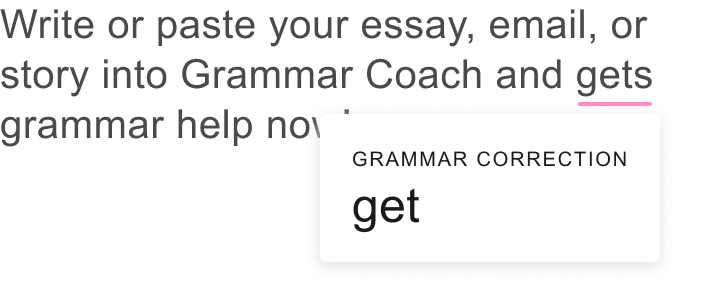

In [258]:
print(soup.prettify())

In [254]:
response.status_code

403

In [ ]:
<a font-weight="inherit" href="/browse/pc" data-linkid="nn1ov4" class="css-1kg1yv8 eh475bn0">PC<!-- --> </a>

In [266]:
terms = soup.find_all('a', attrs = {'font-weight': 'inherit'})
    

In [280]:
terms[2].text

'diplomatic '

In [290]:
terms_lst = []
for i in terms:
    term = i.get_text().lower()
    term = re.sub(f'[^a-z0-9 ]', ' ', term).split('  ')

    for t in term:
        if t.strip() != 'pc':
            
            terms_lst.append(t.strip())
terms_lst.append('political correctness')
terms_lst.append('politically correct')
print(terms_lst)
    

        

['considerate', 'diplomatic', 'gender free', 'inclusive', 'inoffensive', 'multicultural', 'multiculturally sensitive', 'politic', 'respectful', 'sensitive', 'sensitive to others', 'bias free', 'liberal', 'nondiscriminatory', 'nonracist', 'nonsexist', 'unbiased', 'political correctness', 'politically correct']


In [291]:
len(terms_lst)

19

In [292]:
18*100

1800

In [303]:
frame_l = []
for index, word in enumerate(terms_lst):
    c.Search= word

    c.Pandas= True #Enable Pandas integration.

    c.Limit= 100
    c.Hide_output = True
    twint.run.Search(c)

    d = twint.storage.panda.Tweets_df
    frame_l.append(d)
    print(index)

0
1
2
3
4
5
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
6
7
8
9
10
11
12
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
13
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
14
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
15
16
17
18


In [307]:
terms_lst[15]

'nonsexist'

In [308]:
df_pc = pd.concat(frame_l)
df_pc

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1515461690023886854,1515446982411759627,1.650149e+12,2022-04-16 17:46:37,-0500,,@eunique She's such a considerate Princess 😍,en,[],[],...,,,,,,"[{'screen_name': 'eunique', 'name': 'Eunique’s...",,,,
1,1515461598428639235,1515461598428639235,1.650149e+12,2022-04-16 17:46:15,-0500,,"Aw, Anya is such a little sweetheart, kid her ...",en,"[spy_family, spyxfamily]",[],...,,,,,,[],,,,
2,1515461598021926917,1515461598021926917,1.650149e+12,2022-04-16 17:46:15,-0500,,considerate central vacuum cleaner makes you p...,en,[],[],...,,,,,,[],,,,
3,1515461571106861058,1515455205428453383,1.650149e+12,2022-04-16 17:46:09,-0500,,@Etna_Crimson Just thought about this cuz how ...,en,[],[],...,,,,,,"[{'screen_name': 'Etna_Crimson', 'name': 'Etna...",,,,
4,1515461151487799298,1515461151487799298,1.650149e+12,2022-04-16 17:44:29,-0500,,Rositaaaa gets kk na masakit parin pero wag mo...,tl,[],[],...,,,,,,[],,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1515397949416689670,1515249933061959686,1.650134e+12,2022-04-16 13:33:20,-0500,,@ilario82 @olgatokariuk Is putin himself killi...,en,[],[],...,,,,,,"[{'screen_name': 'ilario82', 'name': 'Ilario P...",,,,
96,1515397307897892865,1515397307897892865,1.650134e+12,2022-04-16 13:30:47,-0500,,A little politically correct Final Four @Aubur...,en,[wde],[],...,,,,,,[],,,,
97,1515396513442275339,1515145304059916292,1.650134e+12,2022-04-16 13:27:38,-0500,,@mikeyk1964 @scrowder I have spent a large por...,en,[],[],...,,,,,,"[{'screen_name': 'mikeyk1964', 'name': 'MikeyK...",,,,
98,1515396456890474511,1515385320996585476,1.650134e+12,2022-04-16 13:27:24,-0500,,@kevin_msipha I said its democratically unwise...,en,[],[],...,,,,,,"[{'screen_name': 'kevin_msipha', 'name': 'Kevi...",,,,


In [312]:
df_pc.tweet.iloc[1651]

'@kevin_msipha I said its democratically unwise... democratically referring to numbers. Since numbers determine the winner nothing else... the above statement is politically correct'

In [317]:
def get_tokens(text):
    '''
    Gets all tokens (excluding stop words), excluding punctuation
    '''
    stop = nltk.corpus.stopwords.words('english') + list(string.punctuation) + terms_lst + ['political', 'correctness']
    text = text.translate(str.maketrans('', '', string.punctuation))


    tokens = [i for i in nltk.word_tokenize(text.lower()) if i not in stop and len(i)>2 and "'" not in i]
    return tokens

df_pc['text_tokens'] = df_pc.tweet.apply(get_tokens)

def plot_top_words(series, data_description, n = 30):
    '''
    Plots the top `n`  words in a Pandas series of strings.
    '''

    stop = nltk.corpus.stopwords.words('english') + list(string.punctuation) + terms_lst
    

    full = []
    for line in series:
        try:
            for word in line:
                word = word.lower()
                if word not in stop and len(word) > 2:
                    full.append(word)
        except:
            continue



    total = len(full)
    fd = nltk.FreqDist(full)
    x = []
    y = []
    f = sorted(Counter(full).items(), key = lambda x: x[1], reverse = True)[0:30]
    for i in f:
        x.append((i[0]))
        y.append(np.round(i[1]/total, 3))

        
    fd.plot(n, title='Top words for emoji NO. ' + data_description);
    plt.plot(x, y);
    plt.title('Top frequency of words for emoji NO. ' + data_description);
    plt.xlabel('word');
    plt.ylabel('frequency');

    plt.xticks(rotation=90)
    return 

def plot_top_adj(series, data_description, n = 30):
    '''
    Plots the top `n` adjective words in a Pandas series of strings.
    '''

    stop = nltk.corpus.stopwords.words('english') + list(string.punctuation) + terms_lst

    pos_tagged = series.apply(nltk.pos_tag)
    full = []
    for line in pos_tagged:
        for (word, tag) in line:
            if tag[0:2] == 'JJ' and word not in stop:
                full.append(word)


    total = len(full)
    fd = nltk.FreqDist(full)
    x = []
    y = []
    f = sorted(Counter(full).items(), key = lambda x: x[1], reverse = True)[0:30]
    for i in f:
        x.append((i[0]))
        y.append(np.round(i[1]/total, 3))

        
    fd.plot(n, title='Top adj for emoji NO. ' + data_description);
    plt.plot(x, y);
    print(emo_dic[int(data_description)])
    plt.title('Top frequency of adj for emoji NO. ' + data_description);
    plt.xlabel('adj');
    plt.ylabel('frequency');

    plt.xticks(rotation=90)
    return 

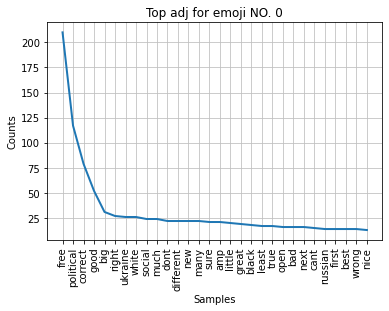

NameError: name 'emo_dic' is not defined

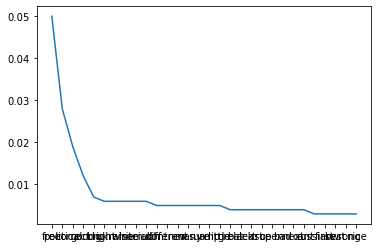

In [319]:
plot_top_adj(df_pc[df_pc.language=='en'].text_tokens, '0')

In [321]:
pip install nlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 10.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 KB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 3.8 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [322]:
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('tagsets', quiet=True) 
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('vader_lexicon', quiet=True)
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nlp
import matplotlib.pyplot as plt

In [331]:
def get_wordnet_pos(word):
    '''
    Tags each word with its Part-of-speech indicator -- specifically used for lemmatization in the get_lemmas function
    '''
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": nltk.corpus.wordnet.ADJ,
                "N": nltk.corpus.wordnet.NOUN,
                "V": nltk.corpus.wordnet.VERB,
                "R": nltk.corpus.wordnet.ADV}

    return tag_dict.get(tag, nltk.corpus.wordnet.NOUN)
def get_lemmas(text):
    '''
    Gets lemmas for a string input, excluding stop words, punctuation, as well as a set of study-specific stop-words
    '''
    tokens = [i for i in nltk.word_tokenize(text.lower()) if i not in STOP]
    lemmas = [nltk.stem.WordNetLemmatizer().lemmatize(t, get_wordnet_pos(t)) for t in tokens]
    return lemmas

def plot_top_lemmas(series, data_description, n = 30):
    '''
    Plots the top `n` lemmas in a Pandas series of strings.
    '''
    lemmas = series.apply(get_lemmas)

    # Extend list so that it contains all words/parts of speech for all the captions
    lemmas_full = []
    for i in lemmas:
        lemmas_full.extend(i)

    nltk.FreqDist(lemmas_full).plot(n, title='Top {} Lemmas Overall for '.format(n) + data_description);
    return

In [332]:
STOP = nltk.corpus.stopwords.words('english') + list(string.punctuation) + terms_lst +  ['political', 'correctness']

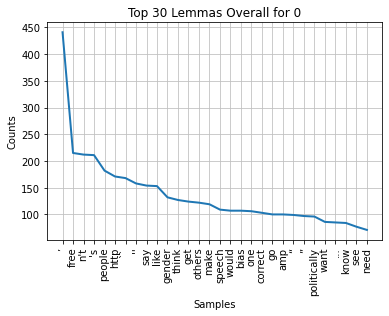

In [333]:
plot_top_lemmas(df_pc[df_pc.language=='en'].tweet, '0')

In [334]:
df_pc['text_lemmas'] = df_pc.tweet.apply(get_lemmas)

In [335]:
df_pc

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,text_tokens,text_lemmas
0,1515461690023886854,1515446982411759627,1.650149e+12,2022-04-16 17:46:37,-0500,,@eunique She's such a considerate Princess 😍,en,[],[],...,,,,"[{'screen_name': 'eunique', 'name': 'Eunique’s...",,,,,"[eunique, shes, princess]","[eunique, 's, princess, 😍]"
1,1515461598428639235,1515461598428639235,1.650149e+12,2022-04-16 17:46:15,-0500,,"Aw, Anya is such a little sweetheart, kid her ...",en,"[spy_family, spyxfamily]",[],...,,,,[],,,,,"[anya, little, sweetheart, kid, age, mindful, ...","[aw, anya, little, sweetheart, kid, age, mindf..."
2,1515461598021926917,1515461598021926917,1.650149e+12,2022-04-16 17:46:15,-0500,,considerate central vacuum cleaner makes you p...,en,[],[],...,,,,[],,,,,"[central, vacuum, cleaner, makes, plastered]","[central, vacuum, cleaner, make, plaster]"
3,1515461571106861058,1515455205428453383,1.650149e+12,2022-04-16 17:46:09,-0500,,@Etna_Crimson Just thought about this cuz how ...,en,[],[],...,,,,"[{'screen_name': 'Etna_Crimson', 'name': 'Etna...",,,,,"[etnacrimson, thought, cuz, low, voice, lol, e...","[etna_crimson, thought, cuz, low, ur, voice, l..."
4,1515461151487799298,1515461151487799298,1.650149e+12,2022-04-16 17:44:29,-0500,,Rositaaaa gets kk na masakit parin pero wag mo...,tl,[],[],...,,,,[],,,,,"[rositaaaa, gets, masakit, parin, pero, wag, n...","[rositaaaa, get, kk, na, masakit, parin, pero,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1515397949416689670,1515249933061959686,1.650134e+12,2022-04-16 13:33:20,-0500,,@ilario82 @olgatokariuk Is putin himself killi...,en,[],[],...,,,,"[{'screen_name': 'ilario82', 'name': 'Ilario P...",,,,,"[ilario82, olgatokariuk, putin, killing, tortu...","[ilario82, olgatokariuk, putin, kill, torture,..."
96,1515397307897892865,1515397307897892865,1.650134e+12,2022-04-16 13:30:47,-0500,,A little politically correct Final Four @Aubur...,en,[wde],[],...,,,,[],,,,,"[little, politically, correct, final, four, au...","[little, politically, correct, final, four, au..."
97,1515396513442275339,1515145304059916292,1.650134e+12,2022-04-16 13:27:38,-0500,,@mikeyk1964 @scrowder I have spent a large por...,en,[],[],...,,,,"[{'screen_name': 'mikeyk1964', 'name': 'MikeyK...",,,,,"[mikeyk1964, scrowder, spent, large, portion, ...","[mikeyk1964, scrowder, spent, large, portion, ..."
98,1515396456890474511,1515385320996585476,1.650134e+12,2022-04-16 13:27:24,-0500,,@kevin_msipha I said its democratically unwise...,en,[],[],...,,,,"[{'screen_name': 'kevin_msipha', 'name': 'Kevi...",,,,,"[kevinmsipha, said, democratically, unwise, de...","[kevin_msipha, say, democratically, unwise, ....."


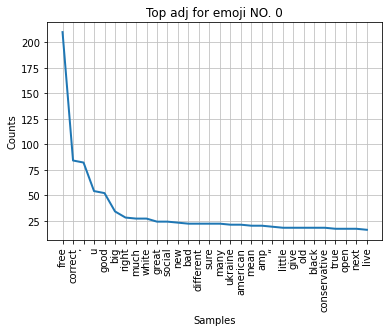

NameError: name 'emo_dic' is not defined

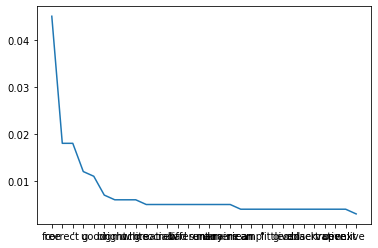

In [338]:
plot_top_adj(df_pc[df_pc.language=='en'].text_lemmas, '0')

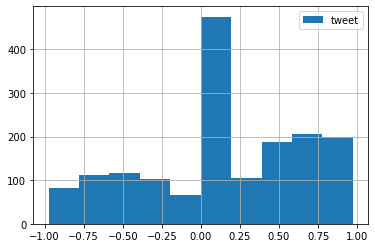

In [339]:
sid = SentimentIntensityAnalyzer()

def sentiment_score(text):
    return sid.polarity_scores(text)['compound']

df_pc['tweet'].apply(sentiment_score).hist(label = 'tweet')

plt.legend()

In [350]:
sid.polarity_scores('sensitive')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [351]:
df_pc[df_pc.language == 'en'].to_csv('/Users/chenzhibin/Desktop/uchicago/Computational research/pc_dataset.csv')

In [352]:
df_pc

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,text_tokens,text_lemmas
0,1515461690023886854,1515446982411759627,1.650149e+12,2022-04-16 17:46:37,-0500,,@eunique She's such a considerate Princess 😍,en,[],[],...,,,,"[{'screen_name': 'eunique', 'name': 'Eunique’s...",,,,,"[eunique, shes, princess]","[eunique, 's, princess, 😍]"
1,1515461598428639235,1515461598428639235,1.650149e+12,2022-04-16 17:46:15,-0500,,"Aw, Anya is such a little sweetheart, kid her ...",en,"[spy_family, spyxfamily]",[],...,,,,[],,,,,"[anya, little, sweetheart, kid, age, mindful, ...","[aw, anya, little, sweetheart, kid, age, mindf..."
2,1515461598021926917,1515461598021926917,1.650149e+12,2022-04-16 17:46:15,-0500,,considerate central vacuum cleaner makes you p...,en,[],[],...,,,,[],,,,,"[central, vacuum, cleaner, makes, plastered]","[central, vacuum, cleaner, make, plaster]"
3,1515461571106861058,1515455205428453383,1.650149e+12,2022-04-16 17:46:09,-0500,,@Etna_Crimson Just thought about this cuz how ...,en,[],[],...,,,,"[{'screen_name': 'Etna_Crimson', 'name': 'Etna...",,,,,"[etnacrimson, thought, cuz, low, voice, lol, e...","[etna_crimson, thought, cuz, low, ur, voice, l..."
4,1515461151487799298,1515461151487799298,1.650149e+12,2022-04-16 17:44:29,-0500,,Rositaaaa gets kk na masakit parin pero wag mo...,tl,[],[],...,,,,[],,,,,"[rositaaaa, gets, masakit, parin, pero, wag, n...","[rositaaaa, get, kk, na, masakit, parin, pero,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1515397949416689670,1515249933061959686,1.650134e+12,2022-04-16 13:33:20,-0500,,@ilario82 @olgatokariuk Is putin himself killi...,en,[],[],...,,,,"[{'screen_name': 'ilario82', 'name': 'Ilario P...",,,,,"[ilario82, olgatokariuk, putin, killing, tortu...","[ilario82, olgatokariuk, putin, kill, torture,..."
96,1515397307897892865,1515397307897892865,1.650134e+12,2022-04-16 13:30:47,-0500,,A little politically correct Final Four @Aubur...,en,[wde],[],...,,,,[],,,,,"[little, politically, correct, final, four, au...","[little, politically, correct, final, four, au..."
97,1515396513442275339,1515145304059916292,1.650134e+12,2022-04-16 13:27:38,-0500,,@mikeyk1964 @scrowder I have spent a large por...,en,[],[],...,,,,"[{'screen_name': 'mikeyk1964', 'name': 'MikeyK...",,,,,"[mikeyk1964, scrowder, spent, large, portion, ...","[mikeyk1964, scrowder, spent, large, portion, ..."
98,1515396456890474511,1515385320996585476,1.650134e+12,2022-04-16 13:27:24,-0500,,@kevin_msipha I said its democratically unwise...,en,[],[],...,,,,"[{'screen_name': 'kevin_msipha', 'name': 'Kevi...",,,,,"[kevinmsipha, said, democratically, unwise, de...","[kevin_msipha, say, democratically, unwise, ....."
